Llevamos  acabo la importacion de las librerias que serán necesarias para este ejercicio de análisis

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# EXPLORACION INICIAL DE DATOS

A continuacion vamos a cargar los 2 archivos .csv con que trabajaremos para este análisis y los convertiremos en DataFrames

In [5]:
df_Flight = pd.read_csv("Customer Flight Activity.csv")
df_Flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [6]:
df_Loyalty = pd.read_csv("Customer Loyalty History.csv")
df_Loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


Hacemos una exploracion inicial de las tablas resultantes (tamaño, tipo de dtos, valores faltantes).

Como resultado tenemos un primer DataFrame de 405624 filas y 10 columnas de datos numericos enteros (salvo una columna de decimales) donde no se observan valores nulos...y un segundo de 16737 filas y 16 columnas, en esta ocasión con numeros enteros, decimales y texto, destacando tres columnas por la presencia de numerosos  nulos que serán objeto de nuestra atencion: Salary, Cancellation Year y Cancellation Month.

In [7]:
df_Flight.shape
df_Flight.info()
df_Flight.isna().sum()

df_Loyalty.shape
df_Loyalty.info()
df_Loyalty.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column          

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

La columna Loyalty Number actúa como identificador único del cliente y permite relacionar ambos datasets y actuando como lo que sería una clave primaria/ foránea en SQL: la columna Loyalty Number actúa como clave primaria en el dataset de clientes (df_Loyalty) y como clave foránea en el dataset de actividad de vuelos (df_Flight), permitiendo relacionar ambos conjuntos de datos. 

Un cliente en el DataFrame de flights podría tener varias filas si ha volado en varios meses. Esto ofrece una relacion one-to-many (1:N) lo que nos determinara el tipo de merge que queremos hacer. 

Si uso df_Loyalty como tabla ppal perdería filas de vuelos... Si uso df_Flight como tabla ppal mantengo todo el historico de actividad. 

Pero tenemos que tener en cuenta que el hecho ppal del análisis es la actividad de vuelo siendo el contexto la clientela por lo que df_Flight debe ser el Data frame base y df_Loyalty aportar la info descriptiva.

In [8]:
# Loyalty Numbers únicos en cada dataframe
flight_customers = set(df_Flight["Loyalty Number"].unique())
loyalty_customers = set(df_Loyalty["Loyalty Number"].unique())

# Clientes en Flight que no están en Loyalty
missing_in_loyalty = flight_customers - loyalty_customers

len(missing_in_loyalty)

0

Acabamos de comprobar cuantos clientes unicos ("Loyalty Number") hay en cada data frame y hemos obtenido la diferencia que es = 0. Eso quiere decir que son los mismos, por lo que tanto un inner join como in left join son válidos para hacer el merge porque no perdemos informacion. 

Elegimos un merge que no multiplique los clientes. Optamos por un merge tipo LEFT: izda df_Flight + dcha df_Loyalty con primary key Loyalty Number.

In [9]:
df_merged = df_Flight.merge(
    df_Loyalty,
    on="Loyalty Number",
    how="left"
)

df_merged.head() #Merge exitoso. Tenemos todas las columnas de ambos datasets

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,...,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,...,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [10]:
df_merged.shape  #Vamos a ver la cantidad de filas y columnas del dataset combinado

(405624, 25)

# LIMPIEZA DE DATOS

Como resultado del merge tenemos 405.624 filas y 25 columnas.  Cada fila representa la actividad mensual de un cliente (único o no) en el programa de lealtad.

In [11]:
df_merged.isna().sum()  #Vamos a ver cuántos valores nulos hay en cada columna

Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
dtype: int64

Observamos que mantenemos los valores nulos en las columnas de Salary, cancellation year y cancellation month.
Interpretamos que en los dos ultimos casos (cancellation year y cancellation month) es porque hay clientes que no han cancelado su membresia. Tal vez es mas limpio modelar este resultado añadiendo su interpretacion en una columna booleana para no tener valores nulos sino informativos (membresia cancelada o no cancelada). Tomaremos como referencia la columna del año porque es un dato mas robusto que el mes.De este modo transformamos nulos en valores que podemos analizar porque ofrecen informacion.
En cuanto a salary es otro tipo de nulo porque aqui nos habla de falta de datos o informacion no proporcionada por la clientela. NO eliminamos esta columna porque mas adelante podemos trabajar con ella y sus datos si es necesario.

In [12]:
df_merged["Is_Cancelled"] = df_merged["Cancellation Year"].notna()
df_merged.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Is_Cancelled
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,False
1,100102,2017,1,10,4,14,2030,203.0,0,0,...,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,False
2,100140,2017,1,6,0,6,1200,120.0,0,0,...,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,False
3,100214,2017,1,0,0,0,0,0.0,0,0,...,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN,False
4,100272,2017,1,0,0,0,0,0.0,0,0,...,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN,False


In [13]:
df_merged["Is_Cancelled"].sum()  

#Hacemos un recuento de numero de registros de actividad (no clientes unicos) que han cancelado.
#Si lo que quisiera es saber numero de clientes unicos cancelados tendria que eliminar duplicados en base a "Loyalty Number" antes de hacer el sum()

np.int64(50064)

In [14]:
df_merged.dtypes
df_merged["Month"].unique() 
#Los meses están en formato numérico (1-12) y ofrece consistencia tenporal con los registros de actividad de vuelo

array([ 1,  9,  2,  3, 11,  4,  5,  7,  6,  8, 10, 12])

In [15]:
df_merged["Year"].unique() 
#Como valores unicos de año nos devuelve 2017 y 2018 que son los años que tenemos en el dataset de actividad de vuelo

array([2017, 2018])

In [16]:
# Revisamosr si hay inconsistencias estando cancelado pero sin año o mes de cancelación
mask_inconsistent = df_merged["Is_Cancelled"] & (
    df_merged["Cancellation Year"].isna() | df_merged["Cancellation Month"].isna()
)

df_merged[mask_inconsistent][
    ["Loyalty Number","Is_Cancelled","Cancellation Year","Cancellation Month"]
].head()


,Loyalty Number,Is_Cancelled,Cancellation Year,Cancellation Month


La consulta no devolvió registros, lo que indica que todos los clientes marcados como cancelados (Is_Cancelled = True) disponen de año y mes de cancelación informados correctamente.

In [17]:
#Vamos a explorar y tratar los nulos de salary:
#Para ello empezamos con el resumen estadistico de sus valores.
df_merged["Salary"].describe()


count    302952.000000
mean      79268.825953
std       34992.133508
min      -58486.000000
25%       59262.000000
50%       73479.000000
75%       88612.000000
max      407228.000000
Name: Salary, dtype: float64

Hay salarios negativos (min = −58 486), que no son válidos (no se cobra en negativo) y claramente es un dato erroneo.
​La mayoría de los salarios está entre 59262 (25%=Q1) y 88612 (75%=Q3), con mediana 73479, lo que parece un rango razonable (para los valores del DataSet).

In [18]:
#Buscamos valores "problemáticos": Negativos o cero
df_merged[df_merged["Salary"] <= 0][["Loyalty Number","Salary"]].head()

,Loyalty Number,Salary
293,115505,-10605.0
961,152016,-58486.0
1740,194065,-31911.0
2111,212128,-49001.0
2464,232755,-46683.0


In [19]:
# Buscamos salarios muy altos (posibles outliers / errores)
q99 = df_merged["Salary"].quantile(0.99)
df_merged[df_merged["Salary"] > q99][["Loyalty Number","Salary"]].head()


,Loyalty Number,Salary
78,103862,299560.0
127,106592,298661.0
312,116895,299899.0
363,119460,297762.0
405,121935,299560.0


​Los salarios cercanos a 300 000–400000 (como 299560, 298661, 299899, 297762...) son muy extremos respecto al resto y como veremos luego en una visualizacion se nos mostrarán como outliers.

Aunque una opción sencilla sería imputar los salarios nulos con la media de la columna, lo descarto porque la distribución de Salary presenta outliers muy extremos que sesgan fuertemente la media. En su lugar, se opto por:
- Limpiar valores imposibles y capar los outliers extremos.
- Imputar los valores nulos con la mediana de Salary tras la limpieza.
- Incluir un indicador Salary_missing para conservar la información de que el
  salario original no estaba disponible.


In [20]:
df = df_merged

# Limpiamos valores imposibles y extremos en "Salary" 
df = df.copy()
df.loc[df["Salary"] <= 0, "Salary"] = np.nan
q99 = df["Salary"].quantile(0.99)
df["Salary"] = df["Salary"].clip(upper=q99)

# creamos una columna de salario faltante
df["Salary_missing"] = df["Salary"].isna()

#Imputamos con la mediana
salary_median = df["Salary"].median()
df["Salary"] = df["Salary"].fillna(salary_median)

#Visualizamos el df con la distribución después de la limpieza e imputación
df_merged["Salary"].isna().sum()
df["Salary"].isna().sum()
df.head()


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Is_Cancelled,Salary_missing
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,False,False
1,100102,2017,1,10,4,14,2030,203.0,0,0,...,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,False,True
2,100140,2017,1,6,0,6,1200,120.0,0,0,...,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,False,True
3,100214,2017,1,0,0,0,0,0.0,0,0,...,Married,Star,4170.57,Standard,2015,8,NaN,NaN,False,False
4,100272,2017,1,0,0,0,0,0.0,0,0,...,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN,False,False


In [21]:
#Este seria el resultado comparativo de la distribución de salarios antes y después de la limpieza e imputación

df_merged["Salary"].describe()
df["Salary"].describe()


count    405624.000000
mean      77734.637891
std       28653.084197
min       15609.000000
25%       63991.000000
50%       73523.000000
75%       82940.000000
max      250253.000000
Name: Salary, dtype: float64

In [22]:
#Comprobamos que no quedan valores negativos o cero
(df["Salary"] <= 0).sum()


np.int64(0)

# ANALISIS ESTADÍSTICO

In [23]:
cols_num = ["Flights Booked","Flights with Companions","Total Flights",
            "Distance","Points Accumulated","Points Redeemed",
            "Dollar Cost Points Redeemed","Salary","CLV"]

# base: describe()
desc = df_merged[cols_num].describe()

# mediana (que es el mismo valor que el percentil 50)
median = df_merged[cols_num].median()
desc.loc["median"] = median

# moda
mode = df_merged[cols_num].mode().iloc[0]
desc.loc["mode"] = mode

# varianza
var = df_merged[cols_num].var()
desc.loc["var"] = var

desc


#Obtenemos un resumen estadistico de las variables numericas mas relevantes (describe) y añadimos mediana, moda y varianza


,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary,CLV
count,405624.000000,405624.000000,405624.000000,4.056240e+05,405624.000000,405624.000000,405624.000000,3.029520e+05,4.056240e+05
mean,4.115052,1.031805,5.146858,1.208880e+03,123.692721,30.696872,2.484503,7.926883e+04,7.991976e+03
std,5.225518,2.076869,6.521227,1.433155e+03,146.599831,125.486049,10.150038,3.499213e+04,6.863664e+03
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-5.848600e+04,1.898010e+03
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.926200e+04,3.985320e+03
50%,1.000000,0.000000,1.000000,4.880000e+02,50.000000,0.000000,0.000000,7.347900e+04,5.776340e+03
75%,8.000000,1.000000,10.000000,2.336000e+03,239.000000,0.000000,0.000000,8.861200e+04,8.936820e+03
max,21.000000,11.000000,32.000000,6.293000e+03,676.500000,876.000000,71.000000,4.072280e+05,8.332538e+04
median,1.000000,0.000000,1.000000,4.880000e+02,50.000000,0.000000,0.000000,7.347900e+04,5.776340e+03
mode,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.019330e+05,3.873650e+03


Vamos a analizar si tenemos valores atípicos, es decir, muy alejados de la media, en las variables numéricas seleccionadas (Flights Booked, Flights with Companions, Total Flights,Distance, Points Accumulated, Points Redeemed,Dollar Cost Points Redeemed, Salary y CLV)
Identificamos estos valores atípicos con la regla 1.5·IQR =regla estadística estándar basada en los cuartiles:

Para cada variable calculamos:
    Q1: valor por debajo del cual está el 25 % de los datos.
    Q3: valor por debajo del cual está el 75 % de los datos.
    IQR = Q3 − Q1 (rango intercuartílico), que mide la anchura de la parte
     central de los datos.

A partir de ahí definimos un rango “normal” de valores:
    Límite inferior = Q1 − 1.5 · IQR
    Límite superior = Q3 + 1.5 · IQR

 Cualquier observación que queda por debajo del límite inferior o por encima del límite superior la consideramos un valor atípico (outlier).

Aplicando esta regla 1.5·IQR a cada variable numérica, contamos cuántos registros se salen de su rango “normal” y obtuvimos el número de outliers por variable (Flights Booked, Distance, Salary, CLV, etc.).

In [24]:
cols_num = ["Flights Booked","Flights with Companions","Total Flights",
            "Distance","Points Accumulated","Points Redeemed",
            "Dollar Cost Points Redeemed","Salary","CLV"]

Q1 = df_merged[cols_num].quantile(0.25)
Q3 = df_merged[cols_num].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_mask = (df_merged[cols_num] < lower) | (df_merged[cols_num] > upper)
df_outliers = df_merged[outliers_mask.any(axis=1)]

df_outliers.shape
outliers_mask.sum()



Flights Booked                   528
Flights with Companions        71560
Total Flights                   1984
Distance                         146
Points Accumulated               127
Points Redeemed                24181
Dollar Cost Points Redeemed    24181
Salary                         13320
CLV                            36192
dtype: int64

En Flights with Companions y en Points Redeemed hay muchísimos outliers: la gran mayoría de clientes viaja/canjea poco, y un grupo relativamente grande lo hace de forma muy intensa, generando una distribución muy sesgada.
En Salary y CLV también hay bastantes outliers (13320 y 36192), lo que refuerza la idea de:
-Clientes con salarios muy altos o erróneos.
-Clientes con CLV muy alto (segmento VIP) y algunos posibles errores.

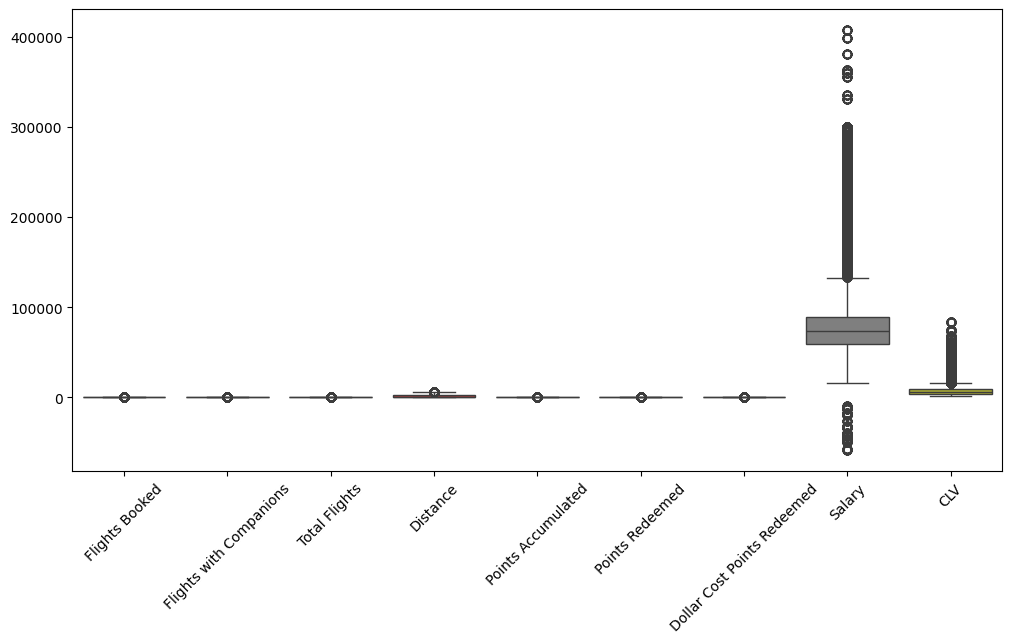

In [25]:
# Boxplots para ver outliers por variable
plt.figure(figsize=(12,6))
sns.boxplot(data=df_merged[cols_num])
plt.xticks(rotation=45)
plt.show()

Que haya muchos outliers en Distance, Salary y CLV indica dos cosas posibles: mezcla de perfiles muy distintos (DISTANCE:clientela que tiene muy poca actividad =0 y muy pocos que son frequent flyers = vuelan mucho y muy lejos) y/o problemas de calidad de datos (SALARY: valores negativos o extremadamente altos pueden indicar errores de captura...). 
En el caso de CLV: es normal que pocos clientes tengan un valor muy alto porque significa un segmento pequeño de clientes "VIP" (=mucho gasto, mucha retencion, fidelidad...)
Las variables relacionadas con la actividad de vuelo y los puntos presentan una alta dispersión, lo que sugiere un comportamiento heterogéneo entre los clientes. En variables como el salario, la mediana resulta más representativa que la media debido a la presencia de valores extremos. El CLV muestra una elevada variabilidad, indicando distintos niveles de valor aportado por los clientes al programa

In [26]:
corr = df_merged[cols_num].corr()
corr

,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary,CLV
Flights Booked,1.000000,0.502500,0.961344,0.767457,0.760279,0.188232,0.188242,0.005804,-0.002964
Flights with Companions,0.502500,1.000000,0.721136,0.517979,0.511090,0.334325,0.334385,0.002493,-0.002583
Total Flights,0.961344,0.721136,1.000000,0.779935,0.771989,0.257307,0.257334,0.005445,-0.003197
Distance,0.767457,0.517979,0.779935,1.000000,0.994564,0.224261,0.224283,0.008042,-0.004252
Points Accumulated,0.760279,0.511090,0.771989,0.994564,1.000000,0.223230,0.223264,0.007867,-0.001075
Points Redeemed,0.188232,0.334325,0.257307,0.224261,0.223230,1.000000,0.999972,0.002845,-0.000304
Dollar Cost Points Redeemed,0.188242,0.334385,0.257334,0.224283,0.223264,0.999972,1.000000,0.002839,-0.000277
Salary,0.005804,0.002493,0.005445,0.008042,0.007867,0.002845,0.002839,1.000000,-0.022637
CLV,-0.002964,-0.002583,-0.003197,-0.004252,-0.001075,-0.000304,-0.000277,-0.022637,1.000000


# Correlación entre variables numéricas
La matriz de correlación muestra que:

Las variables de actividad del cliente (Flights Booked, Flights with Companions,  Total Flights, Distance, Points Accumulated) están fuertemente correlacionadas entre sí. Por ejemplo, Flights Booked y Total Flights tienen una correlaciónde 0.96, y Distance y Points Accumulated una correlación de 0.99, lo que indica
que los clientes que vuelan más lejos y más a menudo acumulan muchos más puntos.

Points Redeemed y Dollar Cost Points Redeemed presentan una correlación prácticamente perfecta (~1.0), ya que el coste en dinero de los canjes depende directamente del número de puntos canjeados.

Salary presenta correlaciones muy cercanas a 0 con el resto de variables,incluida CLV, lo que sugiere que el salario del cliente no guarda una relación lineal clara con su actividad ni con su valor de vida en este conjunto de datos.

CLV también muestra correlaciones muy bajas con las variables de actividad y puntos, de modo que el valor de vida del cliente no parece explicarse únicamente por el número de vuelos, la distancia recorrida o los puntos
acumulados/canjeados.

In [37]:
cats = ["Gender","Education","Marital Status",
        "Loyalty Card","Enrollment Type","Is_Cancelled"]

for c in cats:
    print(c)
    print(df_merged[c].value_counts(normalize=True).round(3))
    print()


Gender
Gender
Female    0.502
Male      0.498
Name: proportion, dtype: float64

Education
Education
Bachelor                0.626
College                 0.253
High School or Below    0.047
Doctor                  0.044
Master                  0.030
Name: proportion, dtype: float64

Marital Status
Marital Status
Married     0.581
Single      0.268
Divorced    0.151
Name: proportion, dtype: float64

Loyalty Card
Loyalty Card
Star      0.454
Nova      0.339
Aurora    0.207
Name: proportion, dtype: float64

Enrollment Type
Enrollment Type
Standard          0.942
2018 Promotion    0.058
Name: proportion, dtype: float64

Is_Cancelled
Is_Cancelled
False    0.877
True     0.123
Name: proportion, dtype: float64



Análisis de variables categóricas:
La base de clientes está bastante equilibrada en género, con nivel educativo alto, mayoría casados, y dominan la tarjeta Star y el alta estándar; solo una minoría ha cancelado.

-Género
Gender
Female    0.502
Male      0.498

La distribución es casi equilibrada: 50.2% mujeres y 49.8% hombres.
No hay un sesgo fuerte hacia un género, así que el programa parece atraer por igual a ambos.

-Educación
Education
Education
Bachelor                0.626
College                 0.253
High School or Below    0.047
Doctor                  0.044
Master                  0.030

La mayoría tiene estudios Bachelor (62.6%) y College (25.3%).
Solo una pequeña parte tiene High School or Below (4.7%) y niveles de Doctor (4.4%) o Master (3.0%), lo que indica un perfil educativo medio-alto.

-Estado civil
Marital Status
Marital Status
Married     0.581
Single      0.268
Divorced    0.151

Predominan los clientes casados (58.1%).
Los solteros representan el 26.8% y los divorciados el 15.1%.

-Tipo de tarjeta de fidelidad
Loyalty Card
Loyalty Card
Star      0.454
Nova      0.339
Aurora    0.207

La tarjeta Star es la más frecuente (45.4%), seguida de Nova (33.9%) y Aurora (20.7%).
Parece que Star es el producto “principal” del programa, mientras que Aurora es la menos común.

-Tipo de alta
Enrollment Type
Enrollment Type
Standard          0.942
2018 Promotion    0.058

Casi todos los clientes entran por Standard (94.2%).
Solo un 5.8% procede de la “2018 Promotion”, por lo que las promociones son una vía minoritaria de captación.

-Cancelación
Is_Cancelled
Is_Cancelled
False    0.877
True     0.123

Un 87.7% de los clientes sigue activo (Is_Cancelled = False).
Un 12.3% ha cancelado el programa, lo que da una idea de la tasa de churn acumulada en el periodo del dataset.

# VISUALIZACION

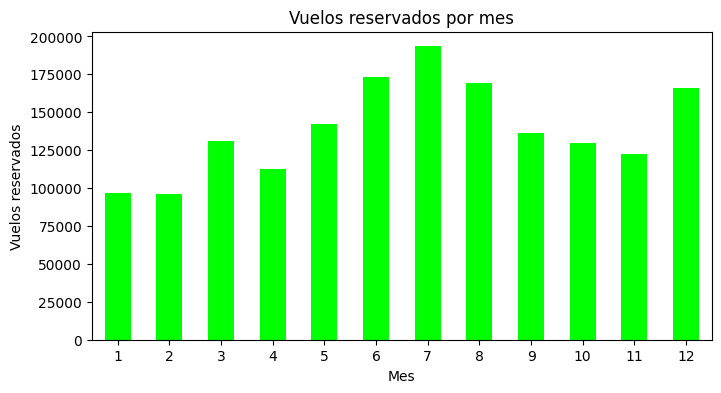

In [42]:
# ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
flights_per_month = (
    df_merged
    .groupby("Month")["Flights Booked"]
    .sum())
    
plt.figure(figsize=(8,4))
flights_per_month.plot(kind="bar",color="lime") 
plt.xlabel("Mes")
plt.ylabel("Vuelos reservados")
plt.title("Vuelos reservados por mes")
plt.xticks(rotation=0)
plt.show()

El gráfico de barras muestra cuántos vuelos se reservan en cada mes del año,permitiendo identificar meses de mayor (julio) y menor (febrero) actividad en las reservas. En general hay mas vuelos en los periodos vacacionales (verano y navidad).

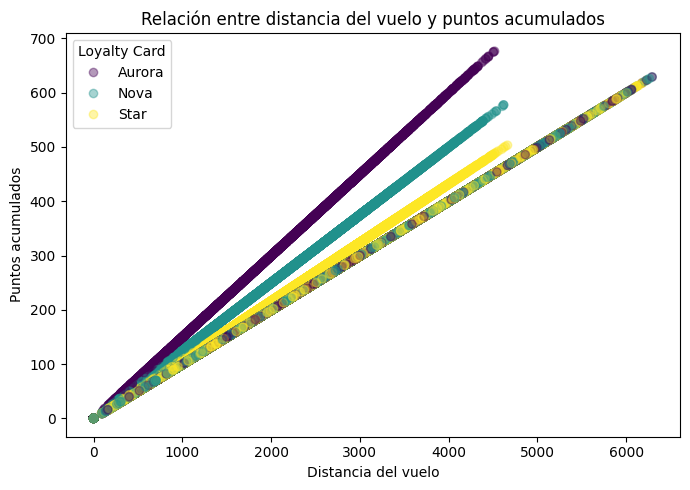

In [ ]:
# ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

plt.figure(figsize=(7,5))

scatter = plt.scatter(
    df_merged["Distance"],
    df_merged["Points Accumulated"],
    c=df_merged["Loyalty Card"].astype("category").cat.codes,  # color por categoría
    cmap="viridis",
    alpha=0.4
)

plt.xlabel("Distancia del vuelo")
plt.ylabel("Puntos acumulados")
plt.title("Relación entre distancia del vuelo y puntos acumulados")

# Leyenda para los colores
handles, _ = scatter.legend_elements()
labels = df_merged["Loyalty Card"].astype("category").cat.categories
plt.legend(handles, labels, title="Loyalty Card", loc="upper left")

plt.tight_layout()
plt.show()


El diagrama de dispersión entre la distancia de los vuelos y los puntos acumulados muestra una relación lineal positiva muy marcada. A medida que aumenta la distancia del vuelo, los puntos acumulados por los clientes también aumentan de forma casi proporcional, lo que sugiere que el programa de fidelidad asigna puntos principalmente en función de los kilómetros volados.

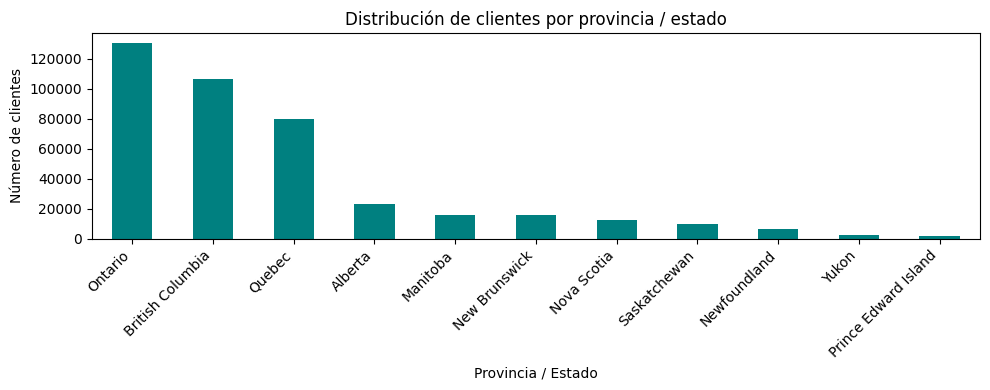

In [45]:
# ¿Cuál es la distribución de los clientes por provincia o estado?

customers_per_state = df_merged["Province"].value_counts()
plt.figure(figsize=(10,4))
customers_per_state.plot(kind="bar", color="teal") 
plt.xlabel("Provincia / Estado")
plt.ylabel("Número de clientes")
plt.title("Distribución de clientes por provincia / estado")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

La base de clientes está fuertemente concentrada en Ontario, British Columbia y Quebec, que reúnen la mayoría de los clientes del programa, mientras que provincias como Newfoundland, Yukon y Prince Edward Island presentan una presencia mucho más reducida.

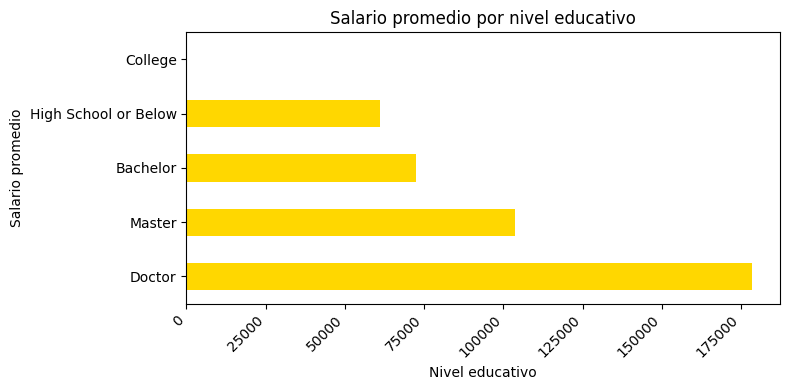

In [54]:
#¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
salary_by_edu = (
    df_merged
    .groupby("Education")["Salary"]
    .mean()
    .sort_values(ascending=False)
)
plt.figure(figsize=(8,4))
salary_by_edu.plot(kind="barh", color="gold")
plt.xlabel("Nivel educativo")
plt.ylabel("Salario promedio")
plt.title("Salario promedio por nivel educativo")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

El salario promedio aumenta con el nivel educativo. Los clientes con doctorado presentan el salario medio más alto, seguidos por los de máster y bachelor, mientras que los de menor nivel educativo muestran los salarios más bajos. Para el grupo College no se dispone de salario promedio al no haber datos válidos.

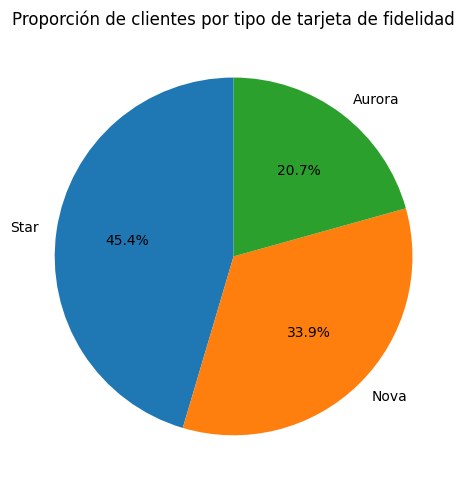

In [32]:
#¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
loyalty_counts = df_merged["Loyalty Card"].value_counts(normalize=True)

plt.figure(figsize=(5,5))
loyalty_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.ylabel("")
plt.title("Proporción de clientes por tipo de tarjeta de fidelidad")
plt.tight_layout()
plt.show()




La mayor parte de los clientes utiliza la tarjeta Star (aprox. 45%), seguida de Nova (alrededor de 34%), mientras que Aurora representa cerca del 21% de la base de clientes. Esto indica que la tarjeta Star es el producto de fidelidad dominante dentro del programa.

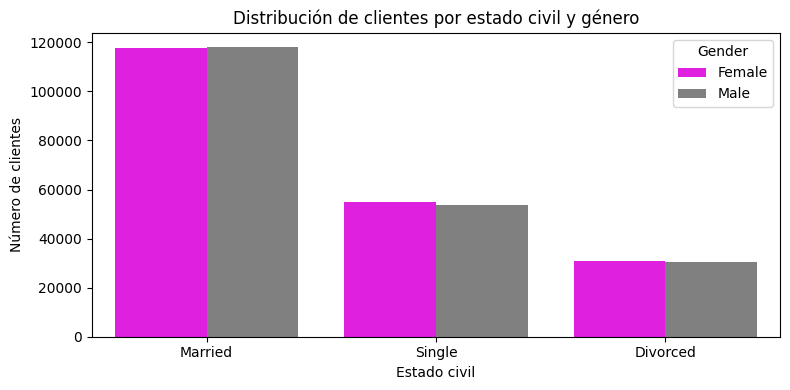

In [55]:
#¿Cómo se distribuyen los clientes según su estado civil y género?
ct = pd.crosstab(df_merged["Marital Status"], df_merged["Gender"])

plt.figure(figsize=(8, 4))
sns.countplot(
    data=df_merged,
    x="Marital Status",
    hue="Gender",
    palette=["magenta", "gray"]  
)

plt.xlabel("Estado civil")
plt.ylabel("Número de clientes")
plt.title("Distribución de clientes por estado civil y género")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

La distribución de clientes según estado civil y género es muy equilibrada. En los tres estados civiles (casado, soltero y divorciado) el número de hombres y mujeres es prácticamente el mismo, sin un sesgo claro hacia un género en particular.

# EVALUACION DE DIFERENCIAS EN RESERVAS DE VUELOS POR NIVEL EDUCATIVO 

In [34]:
# Creamos un DataFrame
df_edu_flights = df_merged[["Flights Booked", "Education"]].copy()
df_edu_flights.head()


,Flights Booked,Education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor


In [58]:
# Agrupamos por nivel educativo para obtener estadisticas: media, desviacion estandar y recuento
stats_edu = (
    df_edu_flights
    .groupby("Education")["Flights Booked"]
    .agg(["mean", "std", "count"])
    .sort_index()
)

print(stats_edu)


                          mean       std   count
Education                                       
Bachelor              4.091093  5.216995  253752
College               4.153012  5.242136  102672
Doctor                4.146281  5.250093   17856
High School or Below  4.155777  5.234551   19008
Master                4.184014  5.210294   12336


# Conclusion:
Al agrupar por nivel educativo y calcular el promedio y la desviación estándar de Flights Booked, se observa que todos los niveles presentan un número medio de vuelos muy similar (≈4 vuelos) y una variabilidad parecida. Esto sugiere que, descriptivamente, no hay grandes diferencias en el número de vuelos reservados según el nivel educativo del cliente.